In [1]:
import pyvista as pv
import numpy as np



In [2]:
import sys
sys.path.insert(0, '..')

In [3]:
from vtk_smoldyn.generate_data import generate_molecule_coordinates

In [4]:
model_fp = 'models/minE_Andrews_052023/model.txt'
mol_data = np.array(generate_molecule_coordinates(model_fp, 2))

Libsmoldyn notification from smolRunSim: Simulation complete


In [5]:
# create plotter 

p = pv.Plotter(shape=(1, 5))

In [6]:
parameter_vals = np.arange(-1.0, 1.5, 0.5)

In [7]:
for val in parameter_vals:
    spline = pv.KochanekSpline(
        mol_data[:6],
        continuity=[val, val, val],
    )
    p.add_text("c = " + str(val))
    p.add_mesh(spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:6]),
        color="k",
        point_size=10,
        render_points_as_spheres=True
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


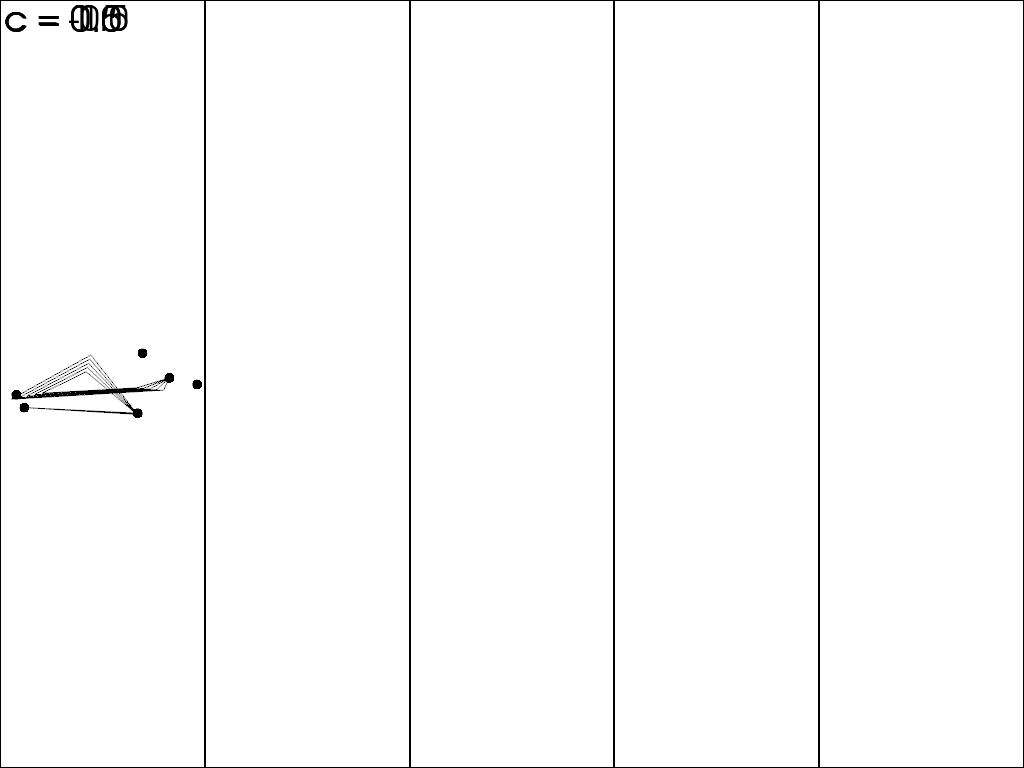

In [8]:
p.show(cpos="xy")

In [9]:
def make_points():
    """Helper to make XYZ points"""
    theta = np.linspace(-4 * np.pi, 4 * np.pi, 6)
    z = np.linspace(-2, 2, 6)
    r = z**2 + 1
    x = r * np.sin(theta)
    y = r * np.cos(theta)
    return np.column_stack((x, y, z))


points = make_points()

In [13]:
p = pv.Plotter(shape=(3, 5))

c = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], continuity=[c[i], c[i], c[i]], n_points=1000)
    p.subplot(0, i)
    p.add_text("c = " + str(c[i]))
    p.add_mesh(kochanek_spline, color="k", point_size=10)
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [14]:
t = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:5], tension=[t[i], t[i], t[i]], n_points=1000)
    p.subplot(1, i)
    p.add_text("t = " + str(t[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

In [15]:
b = [-1.0, -0.5, 0.0, 0.5, 1.0]
for i in range(5):
    kochanek_spline = pv.KochanekSpline(mol_data[:10], bias=[b[i], b[i], b[i]], n_points=1000)
    p.subplot(2, i)
    p.add_text("b = " + str(b[i]))
    p.add_mesh(kochanek_spline, color="k")
    p.add_mesh(
        pv.PolyData(mol_data[:10]),
        color="k",
        point_size=10,
        render_points_as_spheres=True,
    )

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


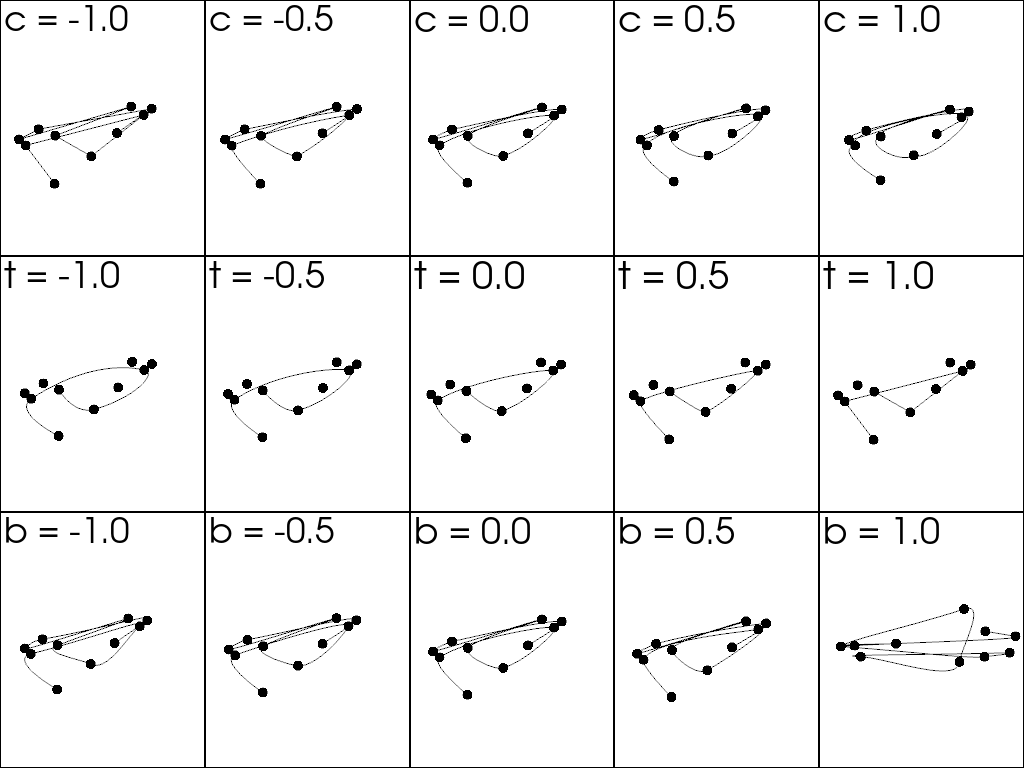

In [16]:
p.show(cpos="xy")

In [17]:
point_cloud = pv.PolyData(mol_data)

In [18]:
point_cloud

PolyData,Information
N Cells,4044861
N Points,4044861
N Strips,0
X Bounds,"-2.000e+00, 2.000e+00"
Y Bounds,"-5.000e-01, 5.000e-01"
Z Bounds,"-5.000e-01, 5.000e-01"
N Arrays,0


In [19]:
np.allclose(mol_data, point_cloud.points)

True

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


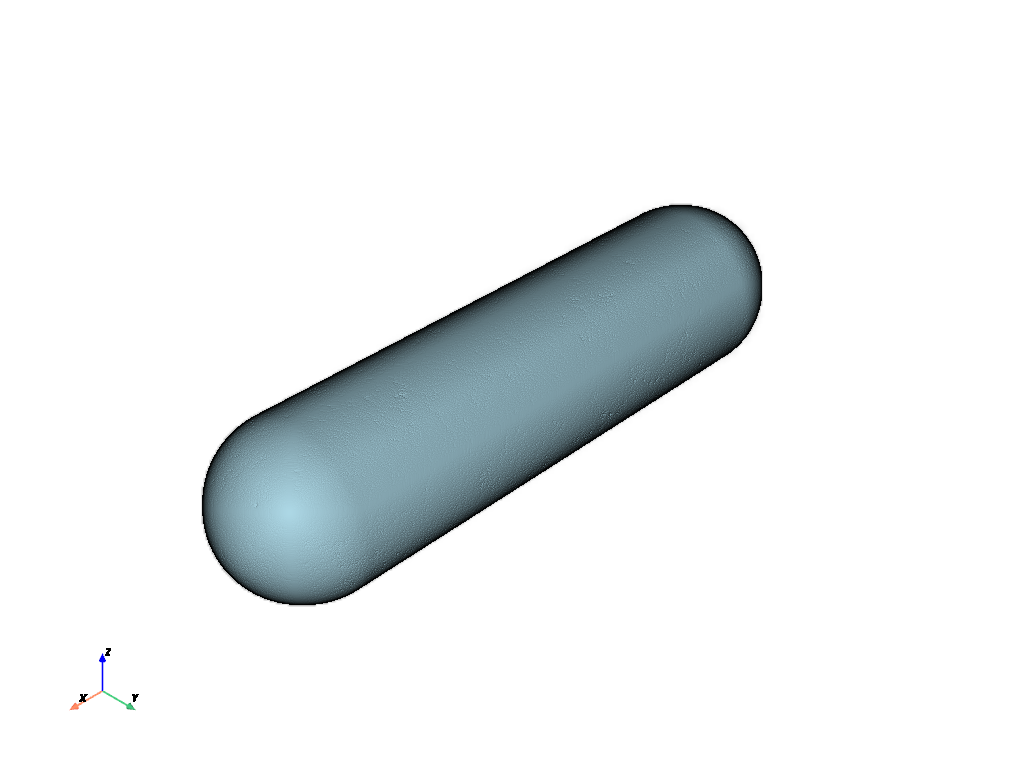

In [20]:
point_cloud.plot(eye_dome_lighting=True)

In [21]:
crowding_model_fp = 'models/crowding4/model.txt'

crowding_mols = generate_molecule_coordinates(crowding_model_fp, 2)

--------------------------------------------------------------
Running Smoldyn 2.72

CONFIGURATION FILE
 Path: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/'
 Name: 'model.txt'
 Reading file: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/model.txt'
 Loaded file successfully
 setting up molecules
 setting up virtual boxes
 setting up compartments
 setting up reactions
 setting up surfaces
 setting up graphics

SIMULATION PARAMETERS
 file: /Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/minE_Andrews_052023/model.txt
 starting clock time: Tue Dec 19 08:40:08 2023
 3 dimensions
 Accuracy level: 5
 Random number seed: 1
 Time from 0 to 500 step 0.002

GRAPHICS PARAMETERS
 No graphical output

WALL PARAMETERS
 wall 0: dimension x, at -2
 wall 1: dimension x, at 2
 wall 2: dimension y, at -0.5
 wall 3: dimension y, at 0.5
 wall 4: dimension z, at -0.5
 wall 5: dimension

Libsmoldyn notification from smolRunSim: Simulation complete


87778
  1214 virtual boxes listed

PARAMETER CHECK
 No errors
 2 total warnings

Simulating
--------------------------------------------------------------
Running Smoldyn 2.72

CONFIGURATION FILE
 Path: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/crowding4/'
 Name: 'model.txt'
 Reading file: '/Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/crowding4/model.txt'
 Loaded file successfully
 setting up molecules
 setting up virtual boxes
 setting up reactions
 setting up surfaces
 setting up graphics

SIMULATION PARAMETERS
 file: /Users/alex/Desktop/uchc_work/experimental/vtk-smoldyn/vtk_smoldyn/models/crowding4/model.txt
 starting clock time: Tue Dec 19 08:40:38 2023
 3 dimensions
 Random number seed: 1702993238
 Time from 0 to 100 step 0.005

GRAPHICS PARAMETERS
 No graphical output

WALL PARAMETERS
 wall 0: dimension x, at 0
 wall 1: dimension x, at 20
 wall 2: dimension y, at 0
 wall 3: dimension y, at 20
 wall 4: dimension z, at 

In [22]:
crowding_point_cloud = pv.PolyData(crowding_mols)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


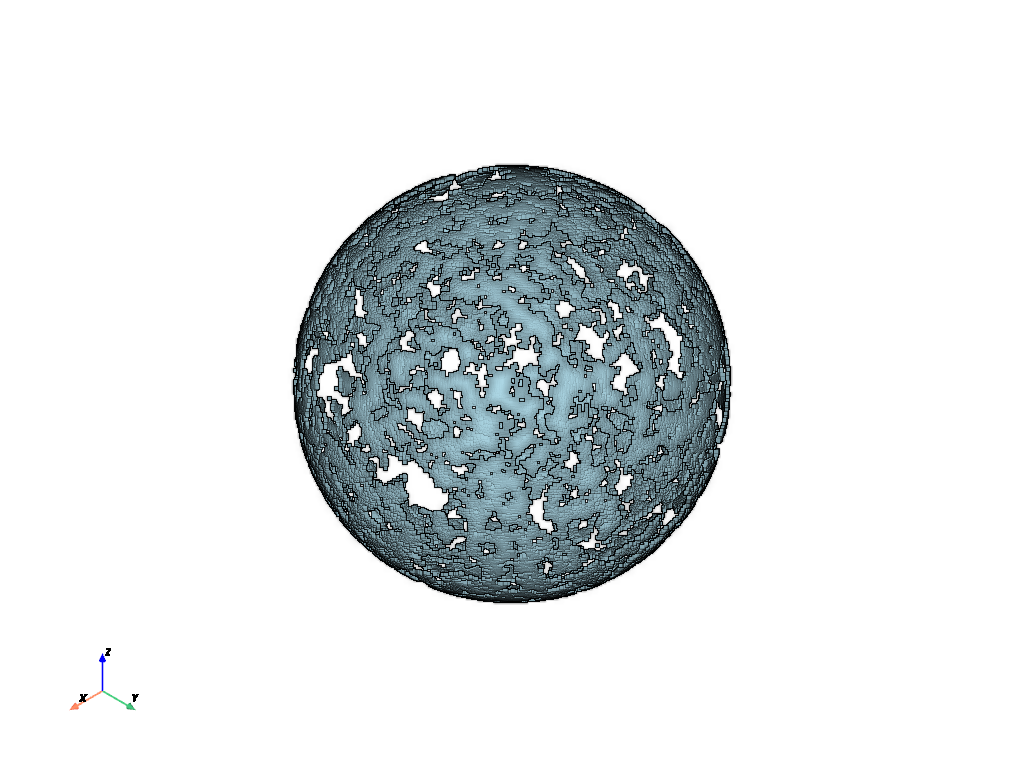

In [23]:
crowding_point_cloud.plot(eye_dome_lighting=True)

In [24]:
z_coords = []
for mol in crowding_mols:
    z_coords.append(mol[-1])
    

In [25]:
def get_axis(agent_coordinates: list[list[float]], axis: int):
    """Return a 1d list of scalar `axis` values from the given `agent_coordinates`.
    
        Args:
            agent_coordinates:`str`: A list of lists where each inner list consists of [x, y, z]. 
            axis:`int`: the index of the desired axis given the syntax x, y, z. Pass `0` for x, 
            `1` for y, and `2` for z. 
            
        Returns:
            A 1d list of axis scalars
    """
    return [agent_coord[axis] for agent_coord in agent_coordinates]

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


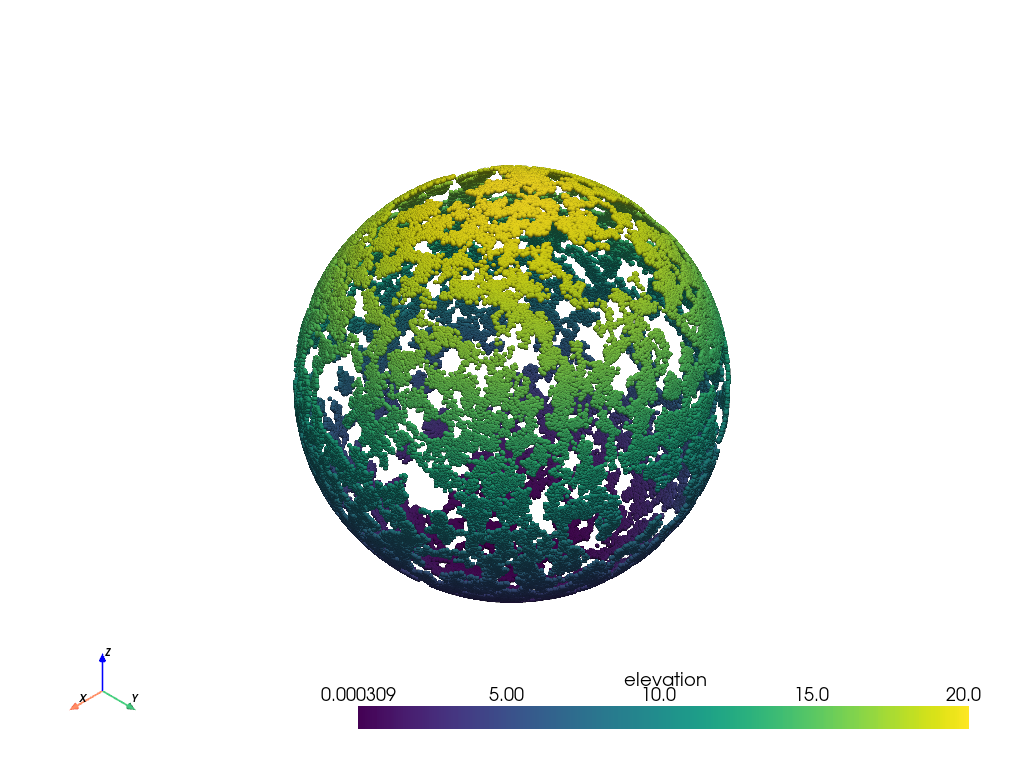

In [26]:
crowding_point_cloud["elevation"] = z_coords
crowding_point_cloud.plot(render_points_as_spheres=True)

In [27]:
def compute_vectors(mesh: pv.PolyData) -> pv.pyvista_ndarray:
    origin = mesh.center 
    vectors = mesh.points - origin 
    vectors = vectors / np.linalg.norm(vectors, axis=1)[:, None]
    return vectors

In [28]:
crowding_vectors = compute_vectors(crowding_point_cloud)

In [29]:
crowding_vectors

pyvista_ndarray([[-0.22538928, -0.9718024 ,  0.06928033],
                 [ 0.8805343 ,  0.46009684, -0.11388698],
                 [-0.13957212, -0.86333594, -0.484944  ],
                 ...,
                 [-0.84502851,  0.36464048, -0.3911063 ],
                 [ 0.21153241,  0.30114864,  0.92981909],
                 [ 0.13588246,  0.24282941,  0.96050499]])

In [30]:
crowding_point_cloud['vectors'] = crowding_vectors 

arrows = crowding_point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.15
)

In [31]:
plotter = pv.Plotter()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


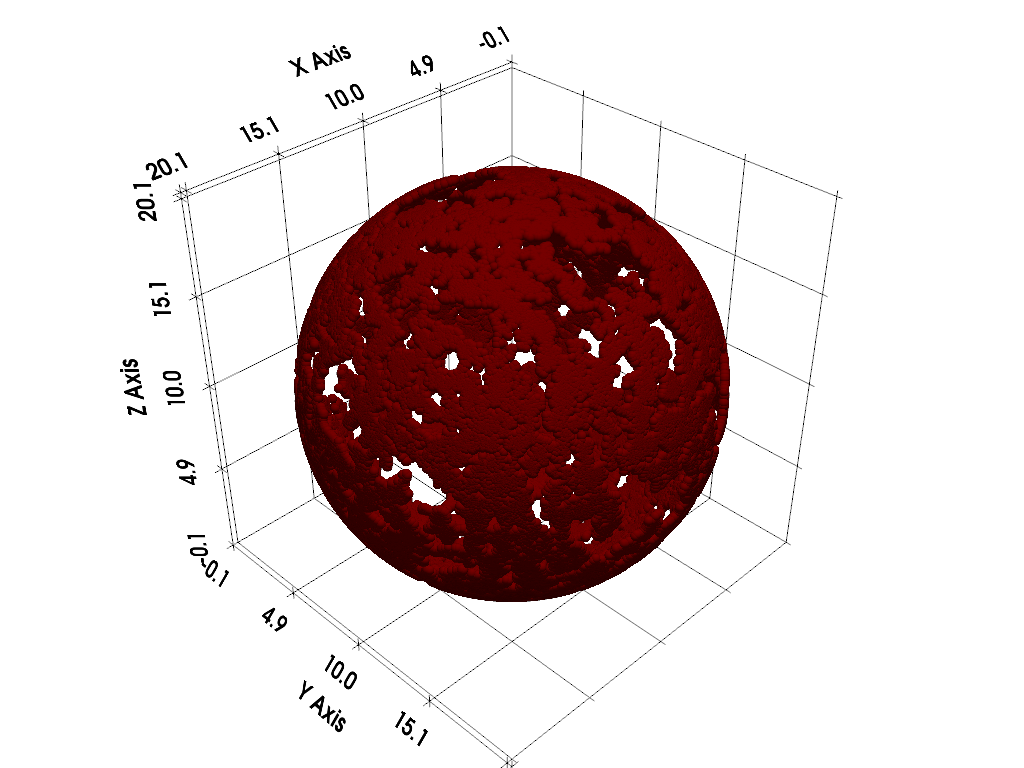

In [32]:
plotter.add_mesh(crowding_point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                          point_color='yellow', point_size=20)

plotter.show_grid()
plotter.show()

In [33]:
minE_vectors = compute_vectors(point_cloud)

In [34]:
minE_z_coords = get_axis(mol_data, 2)

In [35]:
point_cloud['elevation'] = minE_z_coords

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


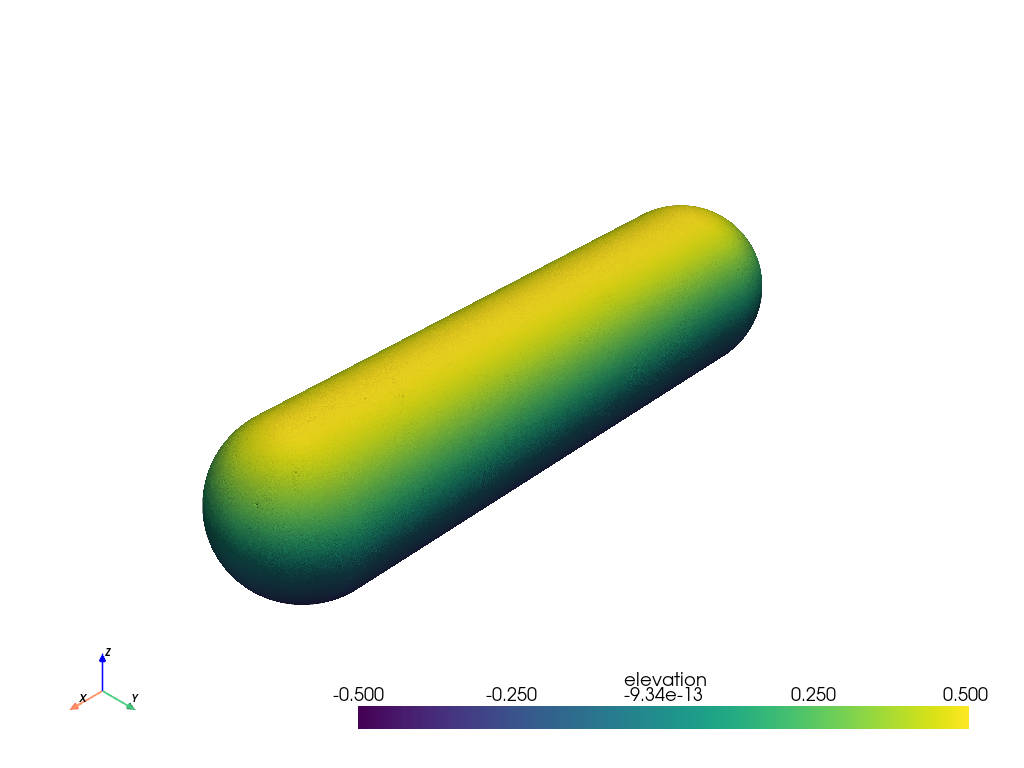

In [36]:
point_cloud.plot(render_points_as_spheres=True)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


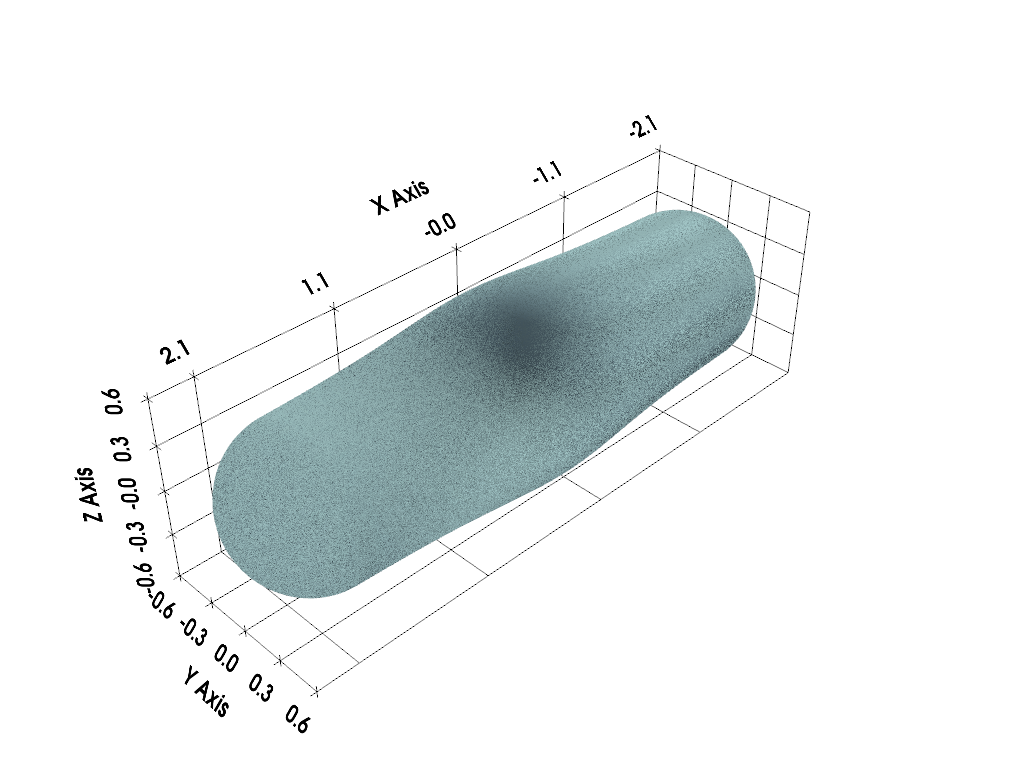

In [37]:
point_cloud['vectors'] = minE_vectors

arrows = point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.15,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                        point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


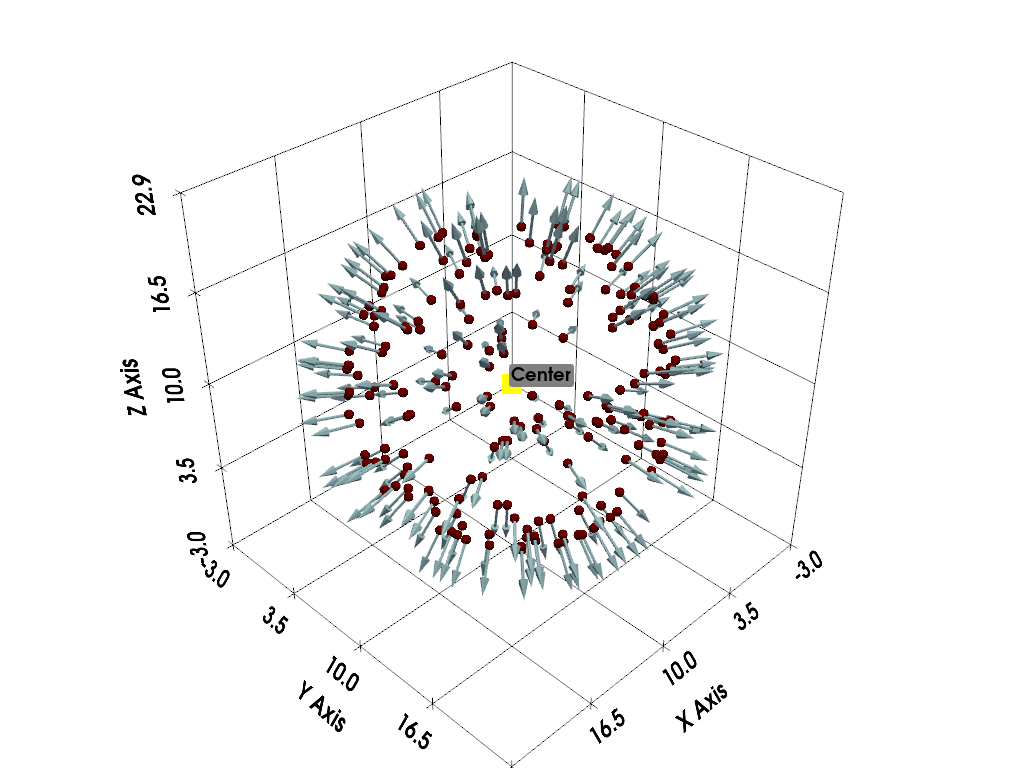

In [38]:
# Create random XYZ points
points = crowding_mols[:200]
# Make PolyData
point_cloud = pv.PolyData(points)

vectors = compute_vectors(point_cloud)
point_cloud['vectors'] = vectors



arrows = point_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=3.0,
)

# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(point_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
plotter.add_point_labels([point_cloud.center,], ['Center',],
                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [39]:
def slice_data(data: list[list[float]], **dims):
    """Slice a 2d array of data given input dimensions.
        
        Args:
            data:`List[List[float]]`: a 2d array of agent coordinate data. For example: [[x0,y0,z0], [x1,y1,z1], ...]
            dims:`kwargs`: keyword arguments are: xstart, xstop, ystart, ystop
    """
    return data[dims['xstart']:dims['xstop'], dims['ystart']:dims['ystop']]

In [40]:
sliced = mol_data[:200]

In [41]:
sliced_cloud = pv.PolyData(sliced)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


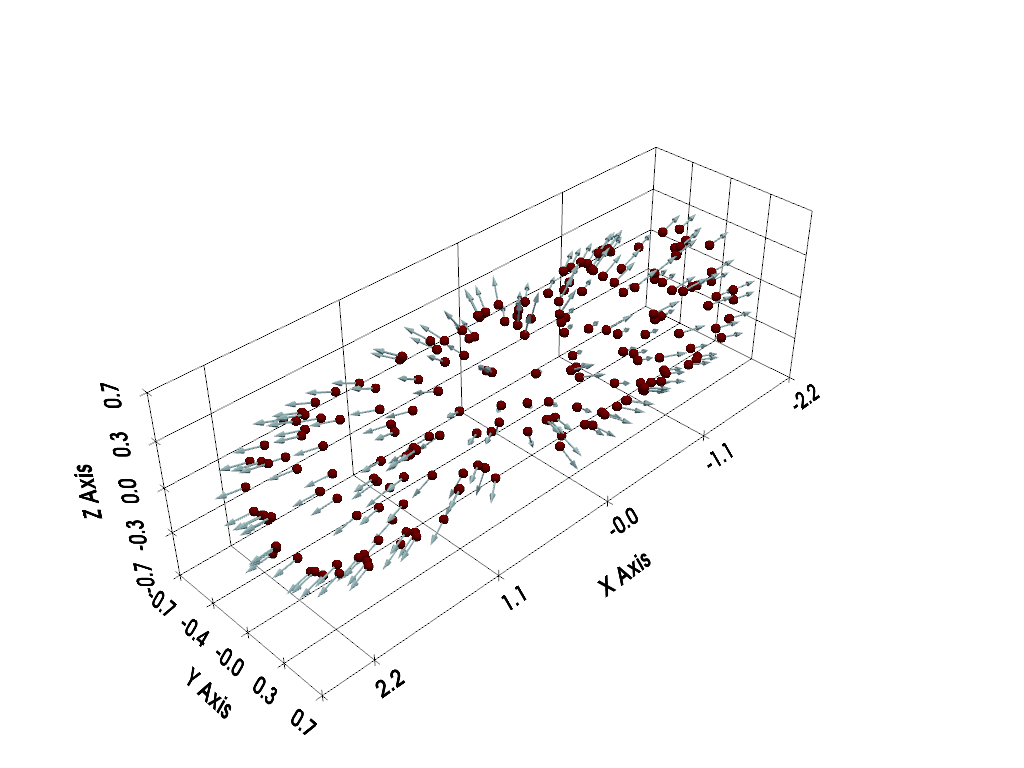

In [42]:
sliced_vectors = compute_vectors(sliced_cloud)

sliced_cloud['vectors'] = sliced_vectors

arrows = sliced_cloud.glyph(
    orient='vectors',
    scale=False,
    factor=0.20,
)


# Display the arrows
plotter = pv.Plotter()
plotter.add_mesh(sliced_cloud, color='maroon', point_size=10.0, render_points_as_spheres=True)
plotter.add_mesh(arrows, color='lightblue')
# plotter.add_point_labels([point_cloud.center,], ['Center',],
#                          point_color='yellow', point_size=20)
plotter.show_grid()
plotter.show()

In [43]:
crowding_pointset = pv.PointSet(var_inp=crowding_mols)

In [44]:
crowding_pointset.surface_indices

<bound method DataSetFilters.surface_indices of PointSet (0x293f480a0)
  N Cells:    0
  N Points:   102255
  X Bounds:   1.054e-04, 2.000e+01
  Y Bounds:   1.262e-03, 1.999e+01
  Z Bounds:   3.088e-04, 2.000e+01
  N Arrays:   0>

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


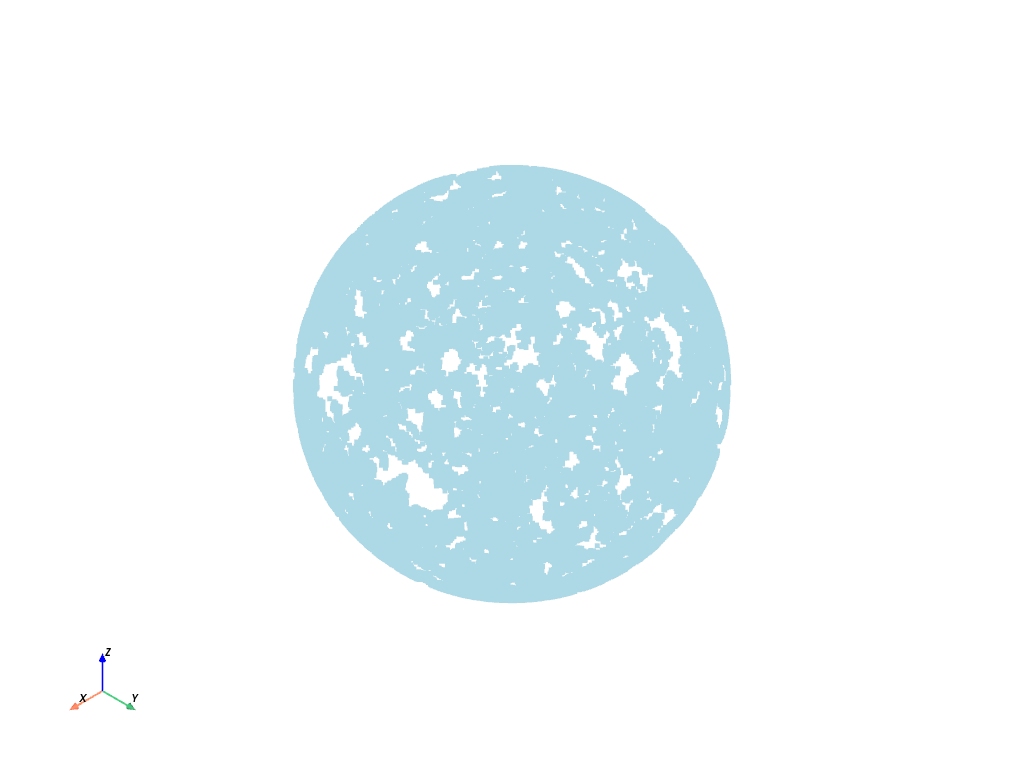

In [45]:
crowding_pointset.plot()

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


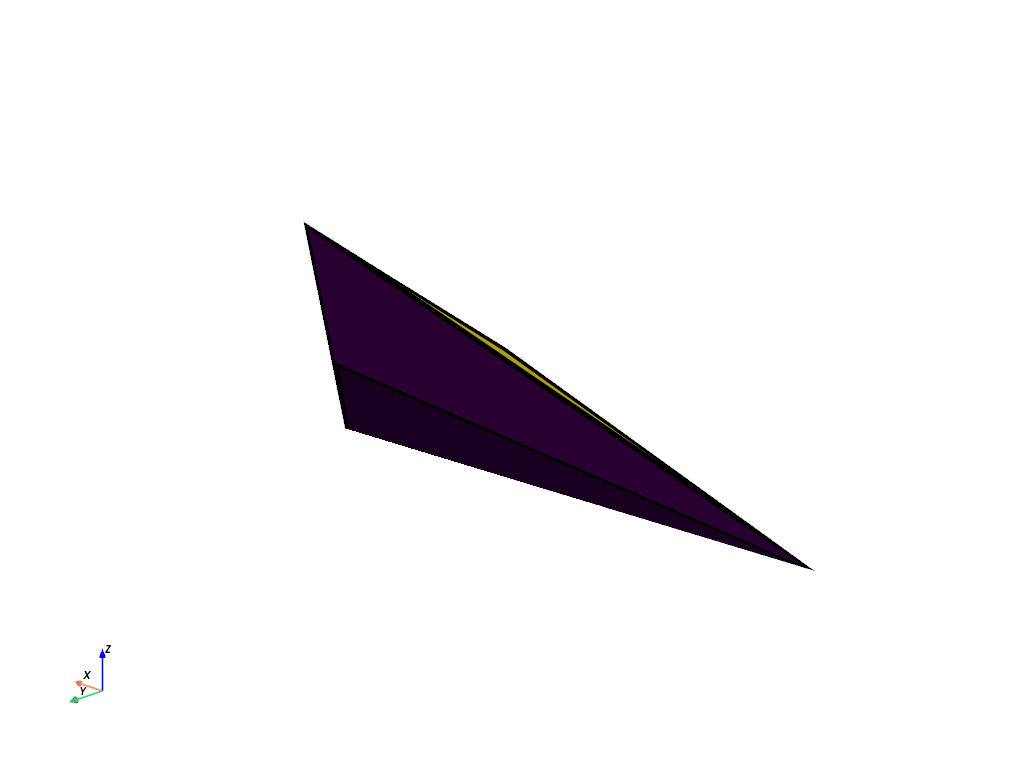

In [46]:
vertices = mol_data
# mesh faces
faces = np.hstack(
    [
        [4, 0, 1, 2, 3],  # square
        [3, 0, 1, 4],  # triangle
        [3, 1, 2, 4],  # triangle
    ]
)

surf = pv.PolyData(vertices, faces)

# plot each face with a different color
surf.plot(
    scalars=np.arange(3),
    cpos=[-1, 1, 0.5],
    show_scalar_bar=False,
    show_edges=True,
    line_width=5,
)

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


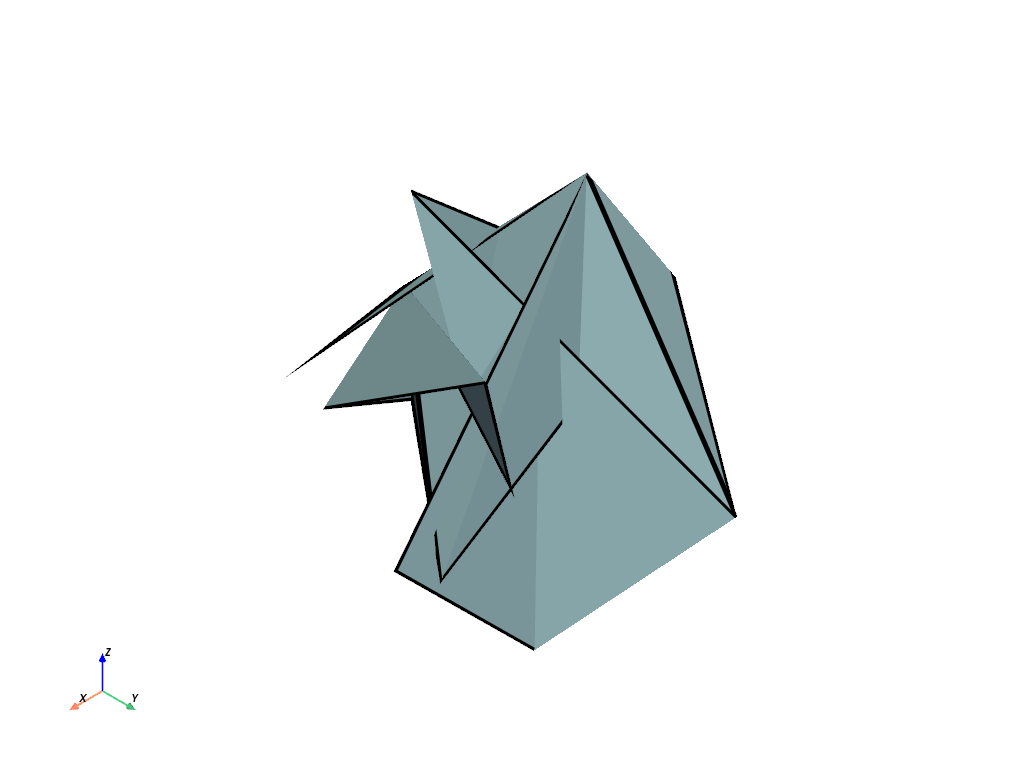

In [47]:
points = crowding_mols

face_a = [6, 0, 1, 2, 3, 4, 5]
face_b = [6, 6, 7, 8, 1, 0, 9]
face_c = [6, 10, 11, 12, 7, 6, 13]
faces = np.concatenate((face_a, face_b, face_c))

mesh = pv.PolyData(points, faces)
mesh.plot(show_edges=True, line_width=5)

In [67]:
probes = pv.examples.download_thermal_probes()

dir(probes)

['ALL_PIECES_EXTENT',
 'AddCellReference',
 'AddObserver',
 'AddReferenceToCell',
 'Allocate',
 'AllocateCellGhostArray',
 'AllocateCopy',
 'AllocateEstimate',
 'AllocateExact',
 'AllocatePointGhostArray',
 'AllocateProportional',
 'AttributeTypes',
 'BOUNDING_BOX',
 'BreakOnError',
 'BuildCellLocator',
 'BuildCells',
 'BuildLinks',
 'BuildLocator',
 'BuildPointLocator',
 'CELL',
 'CELL_DATA_FIELD',
 'CELL_DATA_VECTOR',
 'CheckAttributes',
 'ComputeBounds',
 'ComputeCellsBounds',
 'CopyAttributes',
 'CopyCells',
 'CopyInformationFromPipeline',
 'CopyInformationToPipeline',
 'CopyStructure',
 'Crop',
 'DATA_EXTENT',
 'DATA_EXTENT_TYPE',
 'DATA_NUMBER_OF_GHOST_LEVELS',
 'DATA_NUMBER_OF_PIECES',
 'DATA_OBJECT',
 'DATA_OBJECT_FIELD',
 'DATA_PIECE_NUMBER',
 'DATA_TIME_STEP',
 'DATA_TYPE_NAME',
 'DIRECTION',
 'DataHasBeenGenerated',
 'DebugOff',
 'DebugOn',
 'DeepCopy',
 'DeleteCell',
 'DeleteCells',
 'DeleteLinks',
 'DeletePoint',
 'EDGE',
 'EDGE_DATA_VECTOR',
 'ERR_INCORRECT_FIELD',
 'ERR_

/Users/alex/anaconda3/envs/vtk-smoldyn/lib/python3.10/site-packages/pyvista/jupyter/notebook.py:34: UserWarning: Failed to use notebook backend: 

No module named 'trame'

Falling back to a static output.
  warnings.warn(


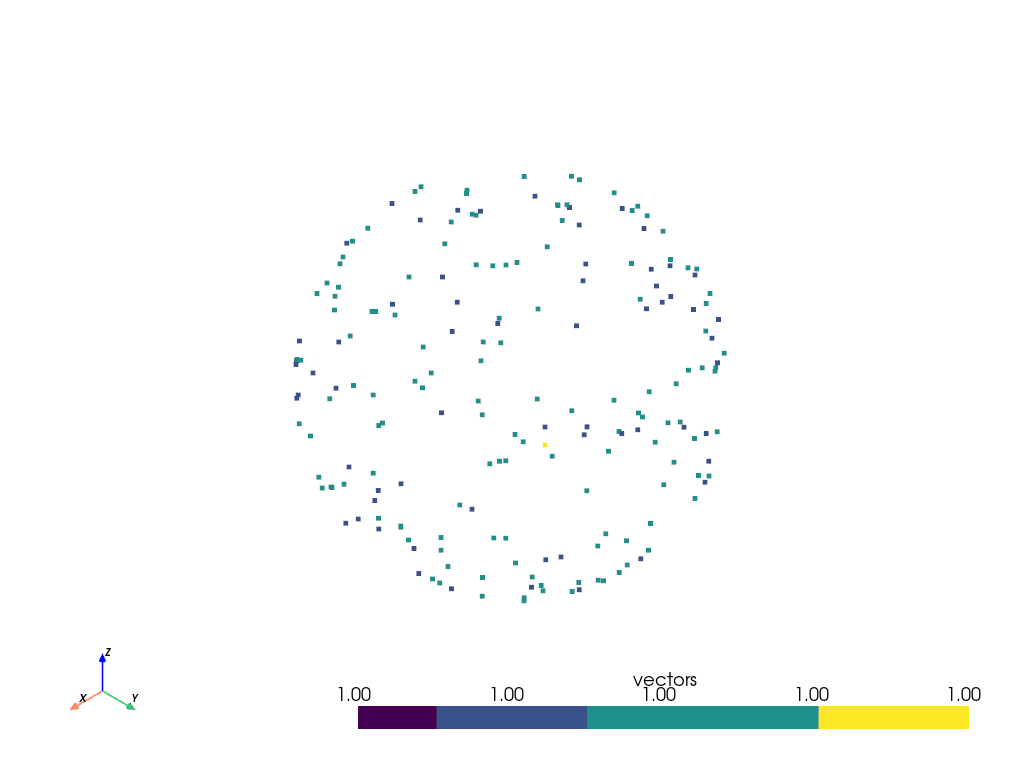

In [63]:
point_cloud.plot()

In [54]:
grid = pv.ImageData()
grid.origin = (329700, 4252600, -2700)
grid.spacing = (250, 250, 50)
grid.dimensions = (60, 75, 100)

In [65]:
dargs = dict(cmap="coolwarm", clim=[0, 300], scalars="temperature (C)")
cpos = [
    (364280.5723737897, 4285326.164400684, 14093.431895014139),
    (337748.7217949739, 4261154.45054595, -637.1092549935128),
    (-0.29629216102673206, -0.23840196609932093, 0.9248651025279784),
]
p = pv.Plotter()
p.add_mesh(grid.outline(), color='k')
p.add_mesh(point_cloud, render_points_as_spheres=True, **dargs)
p.show(cpos=cpos)

KeyError: 'Data array (temperature (C)) not present in this dataset.'

In [68]:
mesh = pv.examples.download_carotid()

mesh.points

array([[100.,  80.,   1.],
       [101.,  80.,   1.],
       [102.,  80.,   1.],
       ...,
       [173., 128.,  45.],
       [174., 128.,  45.],
       [175., 128.,  45.]])

In [69]:
dataset = pv.DataSet(mol_data)

TypeError: DataSet is an abstract class and may not be instantiated.